# Comparação de Modelos de Machine Learning

Autor: Marcos Santana  
Curso: Ciência de Dados e Inteligência Artificial  

Objetivo: Comparar diferentes algoritmos de machine learning para
classificação de aprovação de alunos.

In [28]:
# Importação de bibliotecas
import pandas as pd
import numpy as np

# Visualização dos resultados
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
# Os dois modelos que serão comparados
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

In [29]:
# Criação de um banco de dados com 400 "alunos" para testes da I.A.
np.random.seed(42)
idade = np.random.randint(18, 25, size=400)
nota = np.round(np.random.uniform(np.random.choice([0,1,2,3,4,5], p=[0.05, 0.05, 0.1, 0.2, 0.2,0.4]),np.random.choice([8,9,10], p=[0.1, 0.4, 0.5]), size = 400),1)
faltas = np.random.randint(0,7, size=400)
dados = {
    "idade": idade,
    "nota": nota,
    "faltas": faltas
}

df = pd.DataFrame(dados)

df["aprovado"] = df.apply(
    lambda x: 1 if x["nota"] >= 6 and x["faltas"] <= 3 else 0,
    axis=1
)

df.head()


,idade,nota,faltas,aprovado
0,24,4.2,2,0
1,21,2.2,2,0
2,22,7.2,6,0
3,24,3.4,0,0
4,20,9.5,6,0


In [30]:
# Separação entre dados de entrada e alvo da previsão
FEATURES = df[["idade", "nota", "faltas"]]
target = df["aprovado"]

In [31]:
# Separando os dados para treino (1-0.25 = 75%) e teste (25%)
FEATURES_treino, FEATURES_teste, target_treino, target_teste = train_test_split(
    FEATURES, target, test_size=0.25, random_state=42)


In [32]:
# Treinando o modelo de LogisticRegression
logistica = LogisticRegression()
logistica.fit(FEATURES_treino, target_treino)

pred_log = logistica.predict(FEATURES_teste)

# Testando o modelo e mostrando os resultados
print("LogisticRegression")
print("Acurácia:", accuracy_score(target_teste, pred_log))
print(classification_report(target_teste, pred_log))


LogisticRegression
Acurácia: 0.9
              precision    recall  f1-score   support

           0       0.91      0.94      0.93        68
           1       0.87      0.81      0.84        32

    accuracy                           0.90       100
   macro avg       0.89      0.88      0.88       100
weighted avg       0.90      0.90      0.90       100



In [33]:
# Treinando o modelo de DecisionTree
arvore = DecisionTreeClassifier(random_state=42)
arvore.fit(FEATURES_treino, target_treino)

pred_arv = arvore.predict(FEATURES_teste)

# Testando o modelo e mostrando os resultados
print("DecisionTree")
print("Acurácia:", accuracy_score(target_teste, pred_arv))
print(classification_report(target_teste, pred_arv))


DecisionTree
Acurácia: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        68
           1       1.00      1.00      1.00        32

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [34]:
resultados = {
    "Modelo": ["LogisticRegression", "DecisionTree"],
    "Acurácia": [accuracy_score(target_teste, pred_log), accuracy_score(target_teste, pred_arv)]
}

df_resultados = pd.DataFrame(resultados)
df_resultados

,Modelo,Acurácia
0,LogisticRegression,0.9
1,DecisionTree,1.0


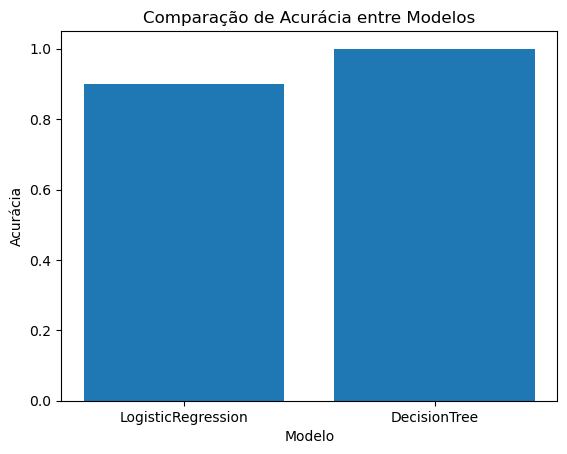

In [35]:
# Visualização da acurácia em grafico de barras
plt.figure()
plt.bar(df_resultados["Modelo"], df_resultados["Acurácia"])
plt.xlabel("Modelo")
plt.ylabel("Acurácia")
plt.title("Comparação de Acurácia entre Modelos")
plt.show()


In [36]:
# Distibuição dos previsoes
df_previsoes = pd.DataFrame({
    "Real": target_teste.values,
    "LogisticRegression": pred_log,
    "DecisionTree": pred_arv
})

df_previsoes.head()

,Real,LogisticRegression,DecisionTree
0,1,1,1
1,0,0,0
2,0,0,0
3,0,0,0
4,0,0,0


In [37]:
# Contagem dos acertos e erros
acertos_log = (df_previsoes["Real"] == df_previsoes["LogisticRegression"]).sum()
erros_log = len(df_previsoes) - acertos_log

acertos_arv = (df_previsoes["Real"] == df_previsoes["DecisionTree"]).sum()
erros_arv = len(df_previsoes) - acertos_arv


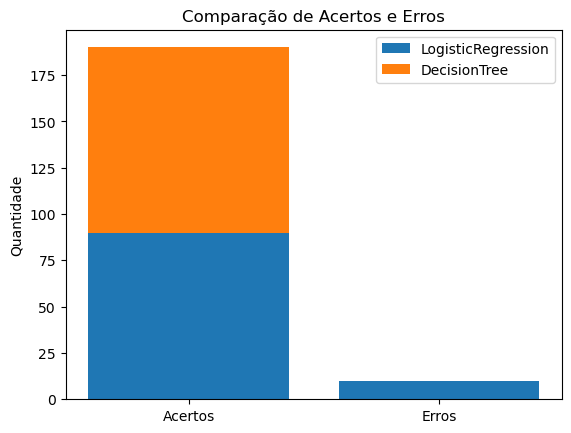

In [41]:
# Gráfico comparando acertos e erros
labels = ["Acertos", "Erros"]
log_values = [acertos_log, erros_log]
arv_values = [acertos_arv, erros_arv]

plt.figure()
plt.bar(labels, log_values, label="LogisticRegression")
plt.bar(labels, arv_values, bottom=log_values, label="DecisionTree")
plt.legend()
plt.title("Comparação de Acertos e Erros")
plt.ylabel("Quantidade")
plt.show()


## Comparação dos Modelos

É visivel que nesse caso específico de previsão, o modelo com maior acurácia
e sensibilidade foi o DecisionTree em relação ao LogisticRegression.
OBS: Em conjuntos pequenos, DecisionTrees podem sofrer overfitting(modelo decora ao invés de aprender).

## Análise Visual dos Resultados

A visualização permitiu observar diferenças claras entre os modelos.
Apesar de apresentarem acurácias semelhantes, a distribuição de erros
mostra que a árvore de decisão é mais sensível ao conjunto de dados,
indicando possível overfitting em bases pequenas.